In [67]:
import json
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import pearsonr
from itertools import permutations
from clip2mesh.utils import Utils

utils = Utils()
warnings.filterwarnings("ignore")

def plot_correlations(jsons_dir: str, three_dmm: str):
    json_files = list(Path(jsons_dir).rglob("*_labels.json"))
    df = pd.DataFrame()
    for json_file in json_files:
        with open(json_file, "r") as f:
            json_data = json.load(f)
            df = df.append(json_data, ignore_index=True)
    df = df.apply(lambda x: [y[0][0] for y in x])
    permut_list = []
    for x, y in permutations(df.columns, 2):
        if (x, y) in permut_list or (y, x) in permut_list:
            continue
        permut_list.append((x, y))
    plot_shape = utils.get_plot_shape(len(permut_list))[0]
    fig, axs = plt.subplots(plot_shape[0], plot_shape[1], figsize=(20, 20))
    for i, (col1, col2) in enumerate(permut_list):
        axs[i // plot_shape[1], i % plot_shape[1]].scatter(df[col1], df[col2], alpha=0.3, marker='.', color='green')
        axs[i // plot_shape[1], i % plot_shape[1]].set_title(f"{col1} vs. {col2} -> {pearsonr(df[col1], df[col2]).statistic:.2f}")
        axs[i // plot_shape[1], i % plot_shape[1]].set_ylabel(col2)
        axs[i // plot_shape[1], i % plot_shape[1]].set_xlabel(col1)
        axs[i // plot_shape[1], i % plot_shape[1]].plot(
            df[col1], np.poly1d(np.polyfit(df[col1], df[col2], 1))(df[col1]), color="red", alpha=0.8,
        )
        axs[i // plot_shape[1], i % plot_shape[1]].set_xticks([])
        axs[i // plot_shape[1], i % plot_shape[1]].set_yticks([])
    fig.suptitle(f"Correlation between labels - {three_dmm}", fontsize=20)
    fig.tight_layout(pad=3.0)
    plt.show()
    fig.savefig(f"/home/nadav2/dev/data/CLIP2Shape/outs/labels_correlations/{three_dmm}.png")


# FLAME SHAPE

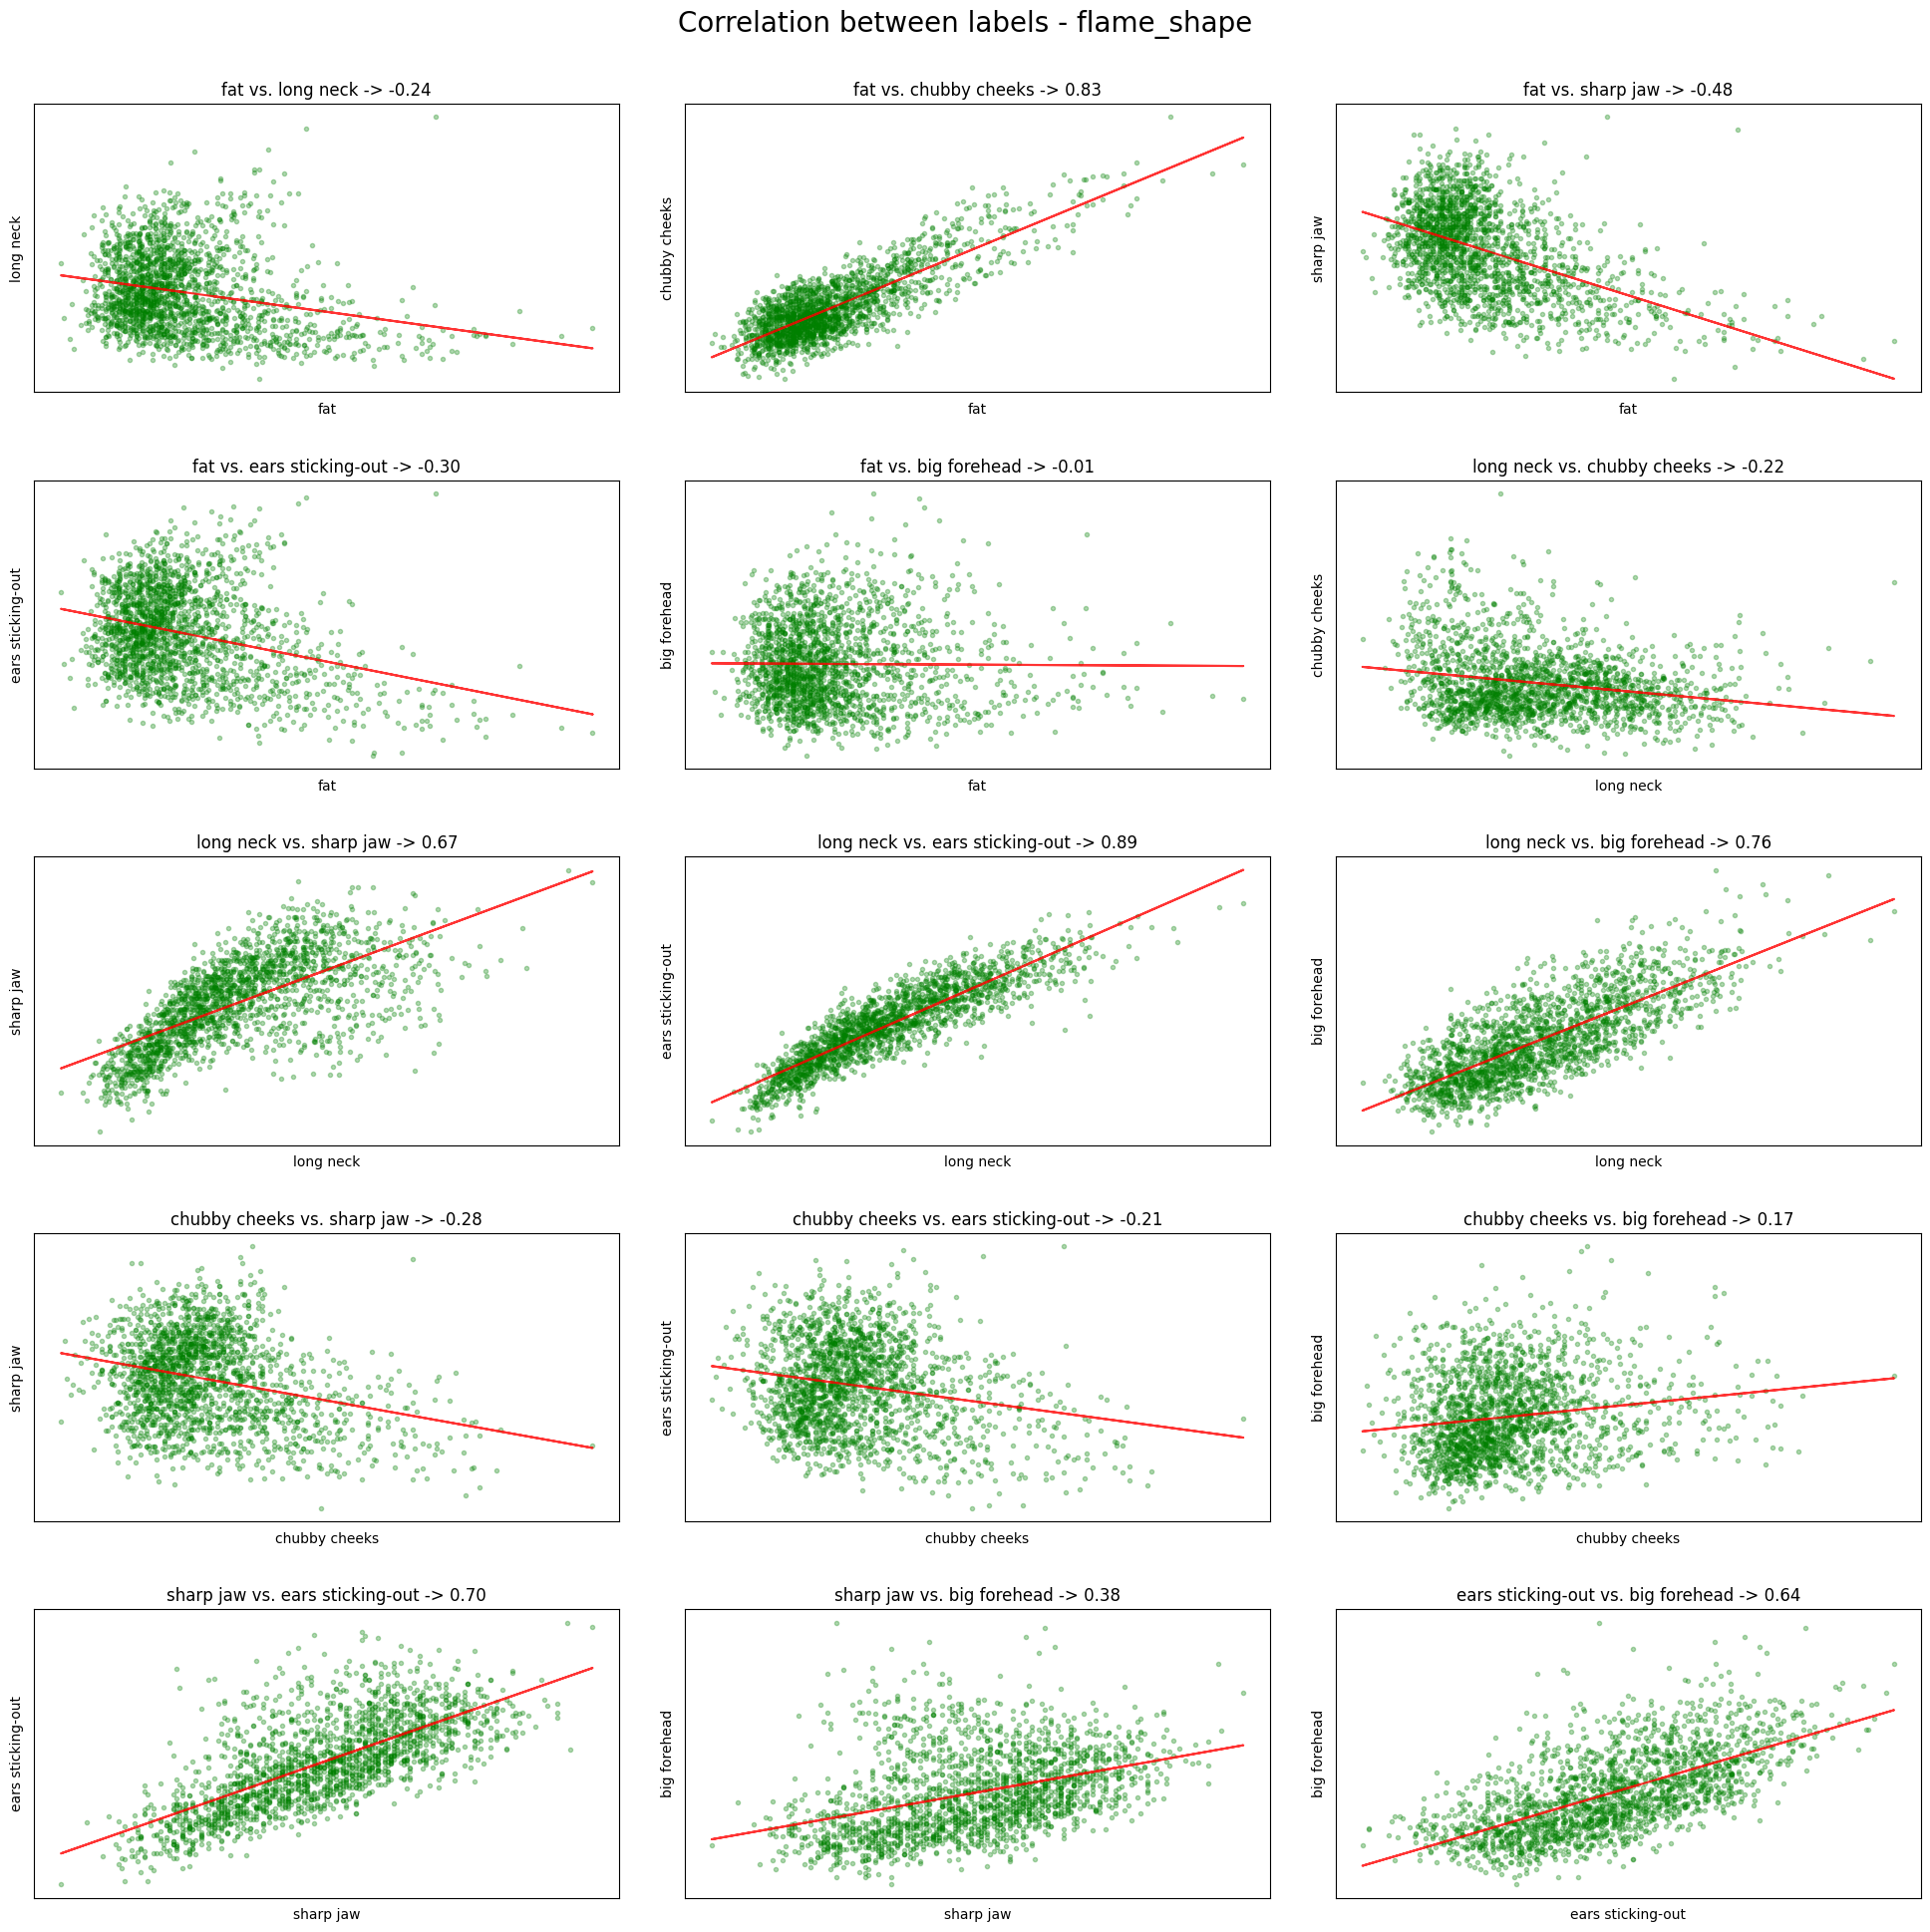

In [68]:
# create data frame from json files - columns are labels and rows are images
jsons_dir = "/home/nadav2/dev/data/CLIP2Shape/images/flame_shape_py3d"
plot_correlations(jsons_dir, "flame_shape")

# FLAME EXPRESSION

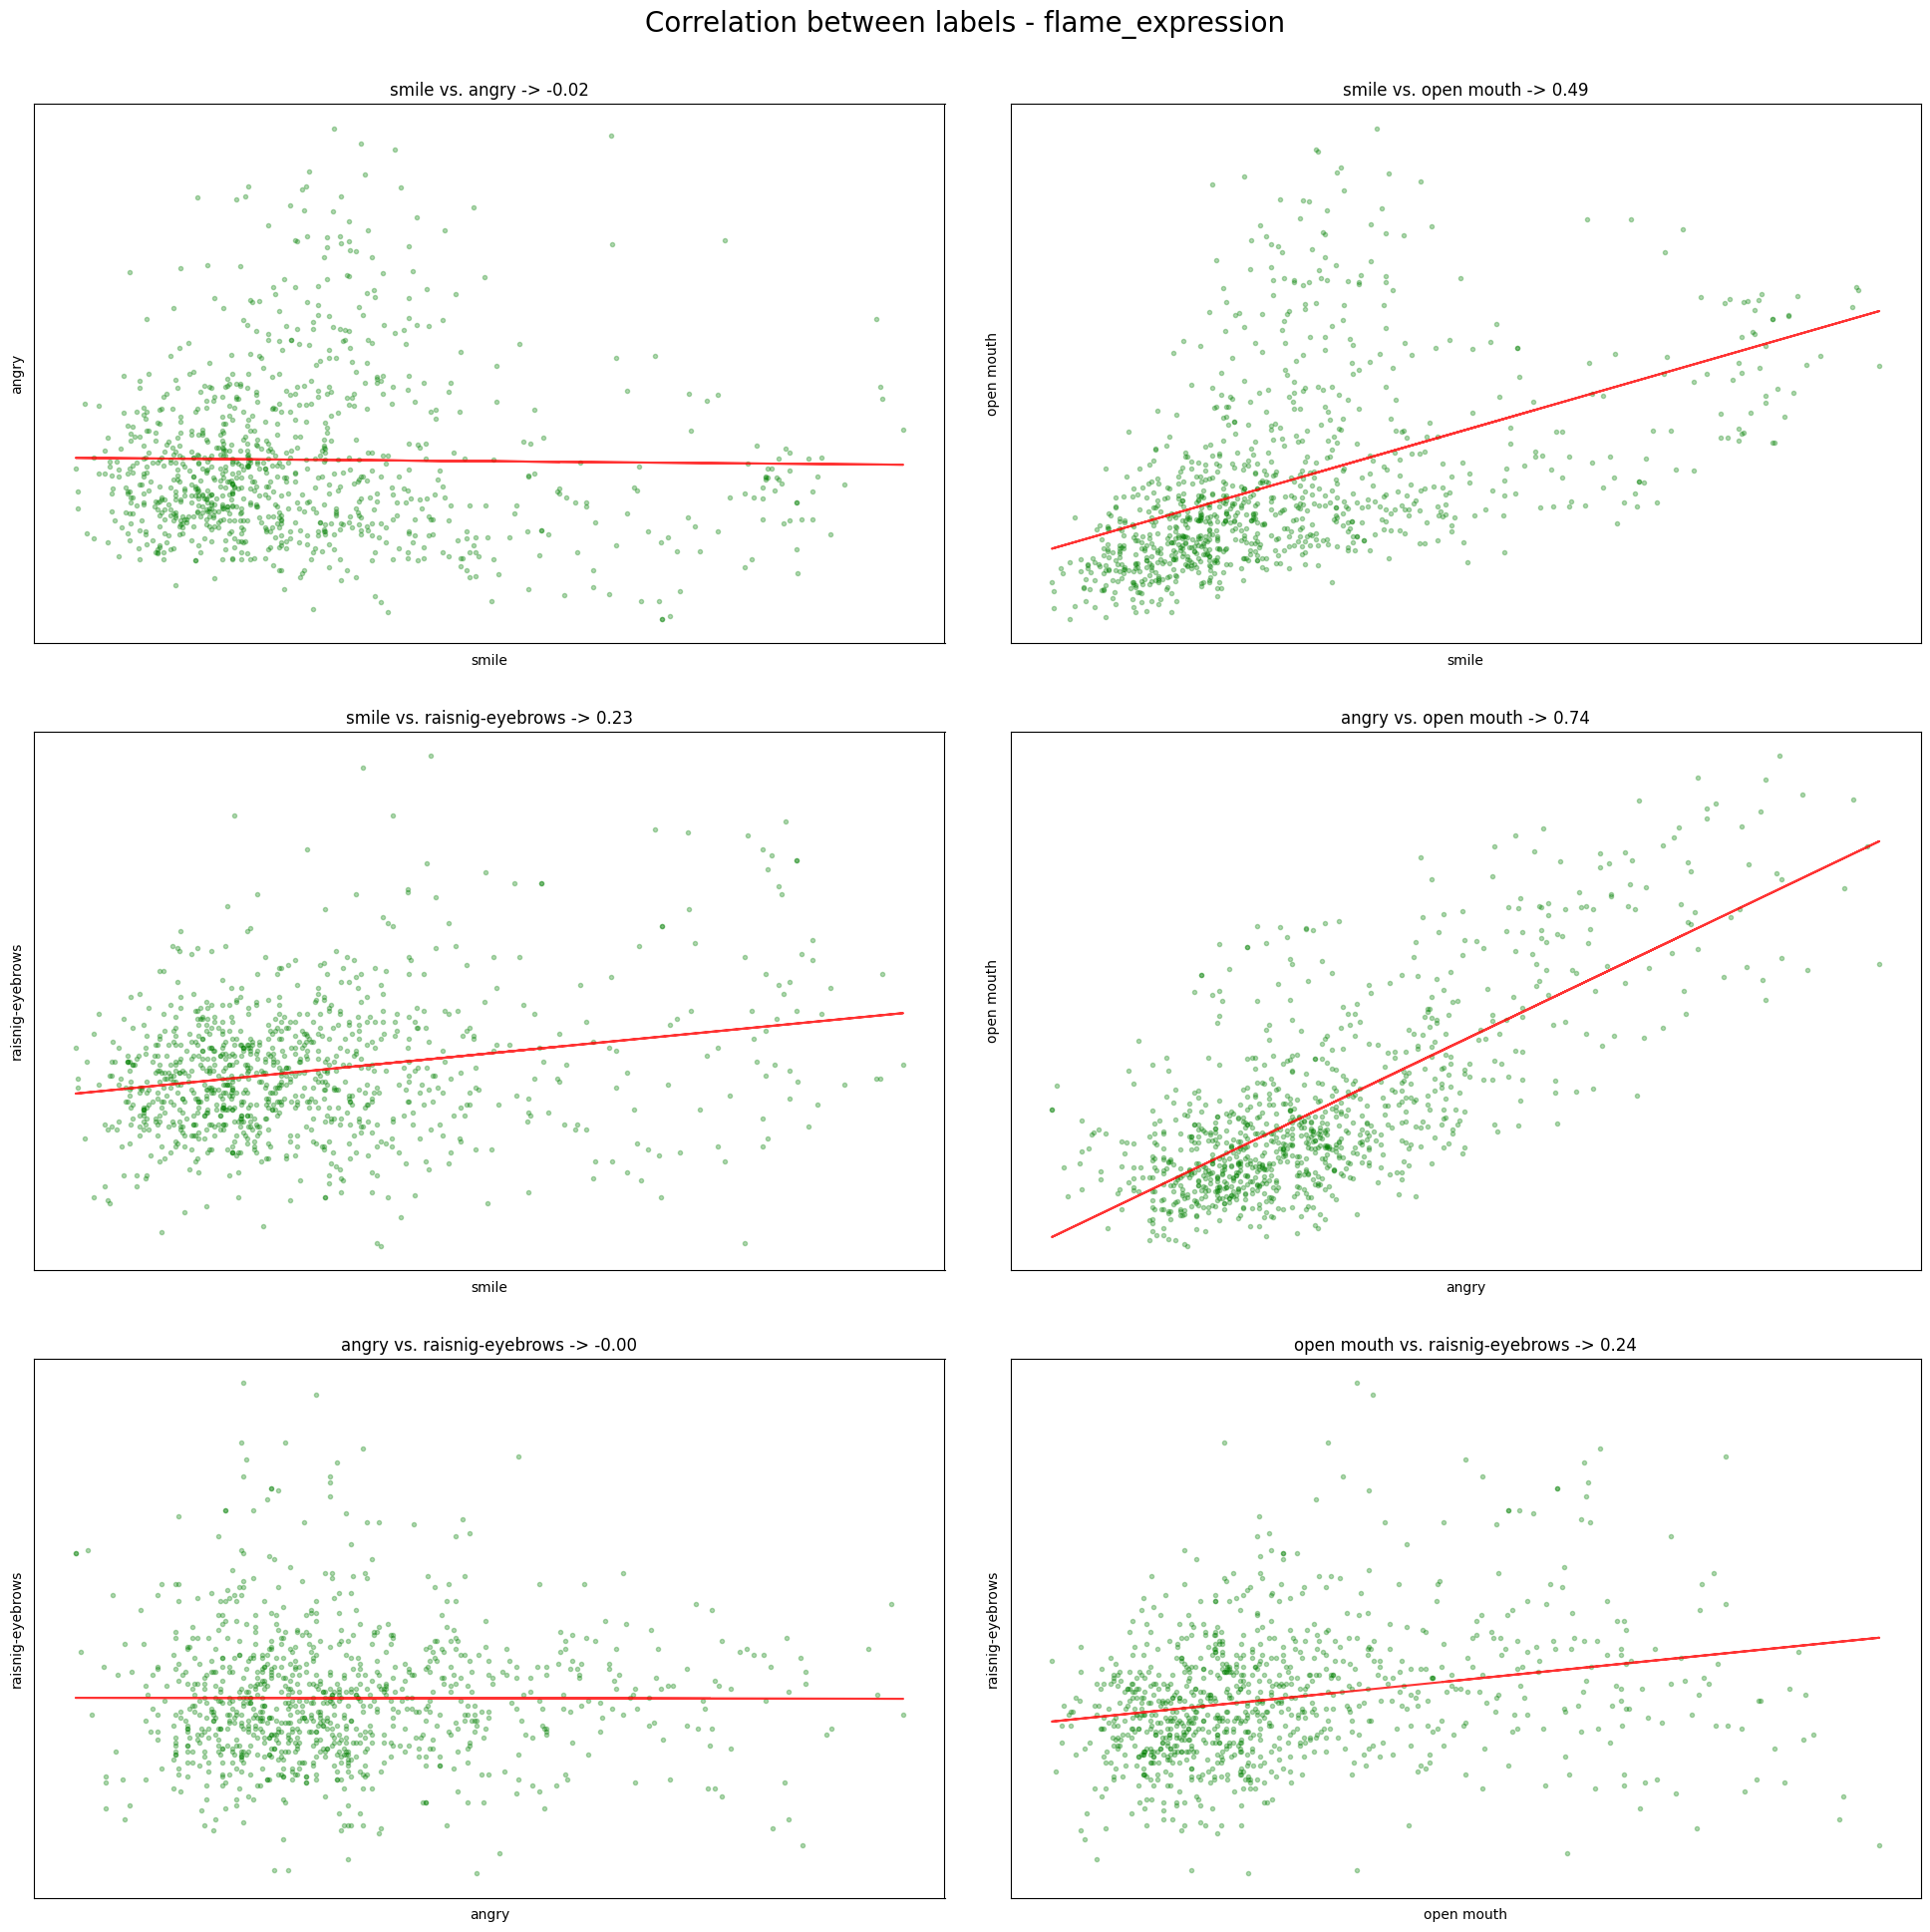

In [70]:
# create data frame from json files - columns are labels and rows are images
jsons_dir = "/home/nadav2/dev/data/CLIP2Shape/images/flame_textured_exp"
plot_correlations(jsons_dir=jsons_dir, three_dmm="flame_expression")

# SMPLX

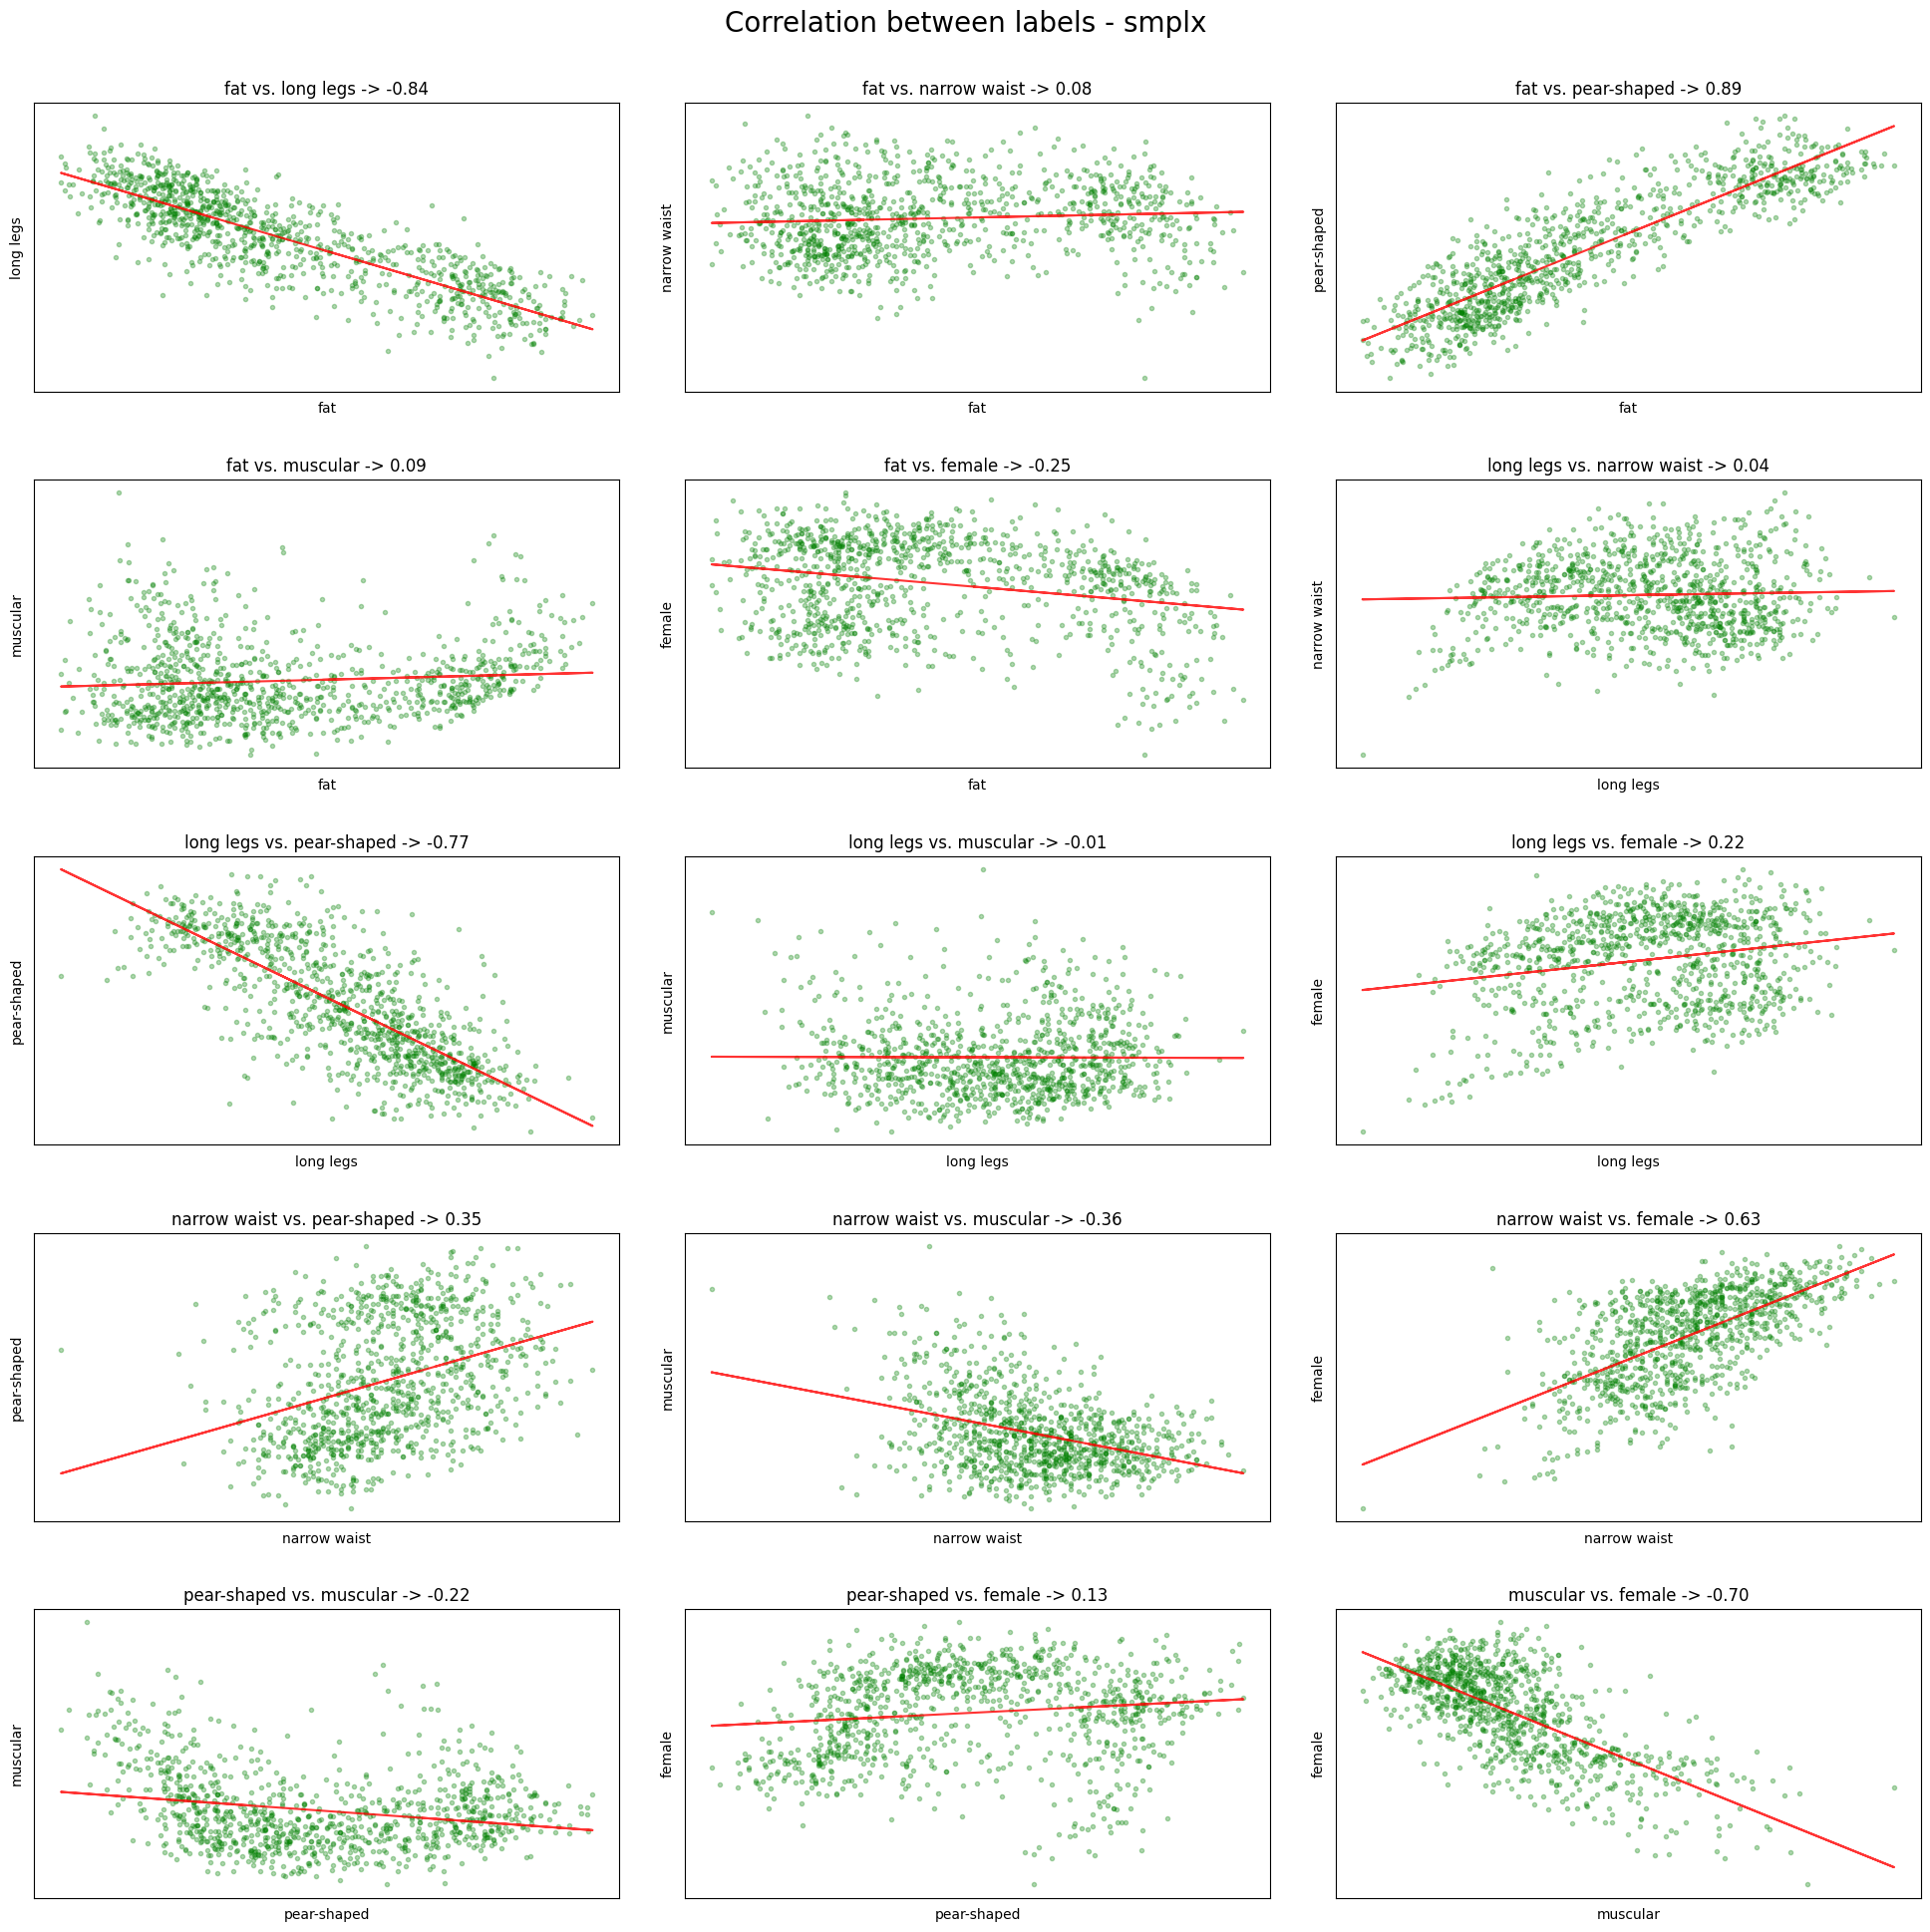

In [71]:
plot_correlations("/home/nadav2/dev/data/CLIP2Shape/images/with_texture", three_dmm="smplx")

# SMAL

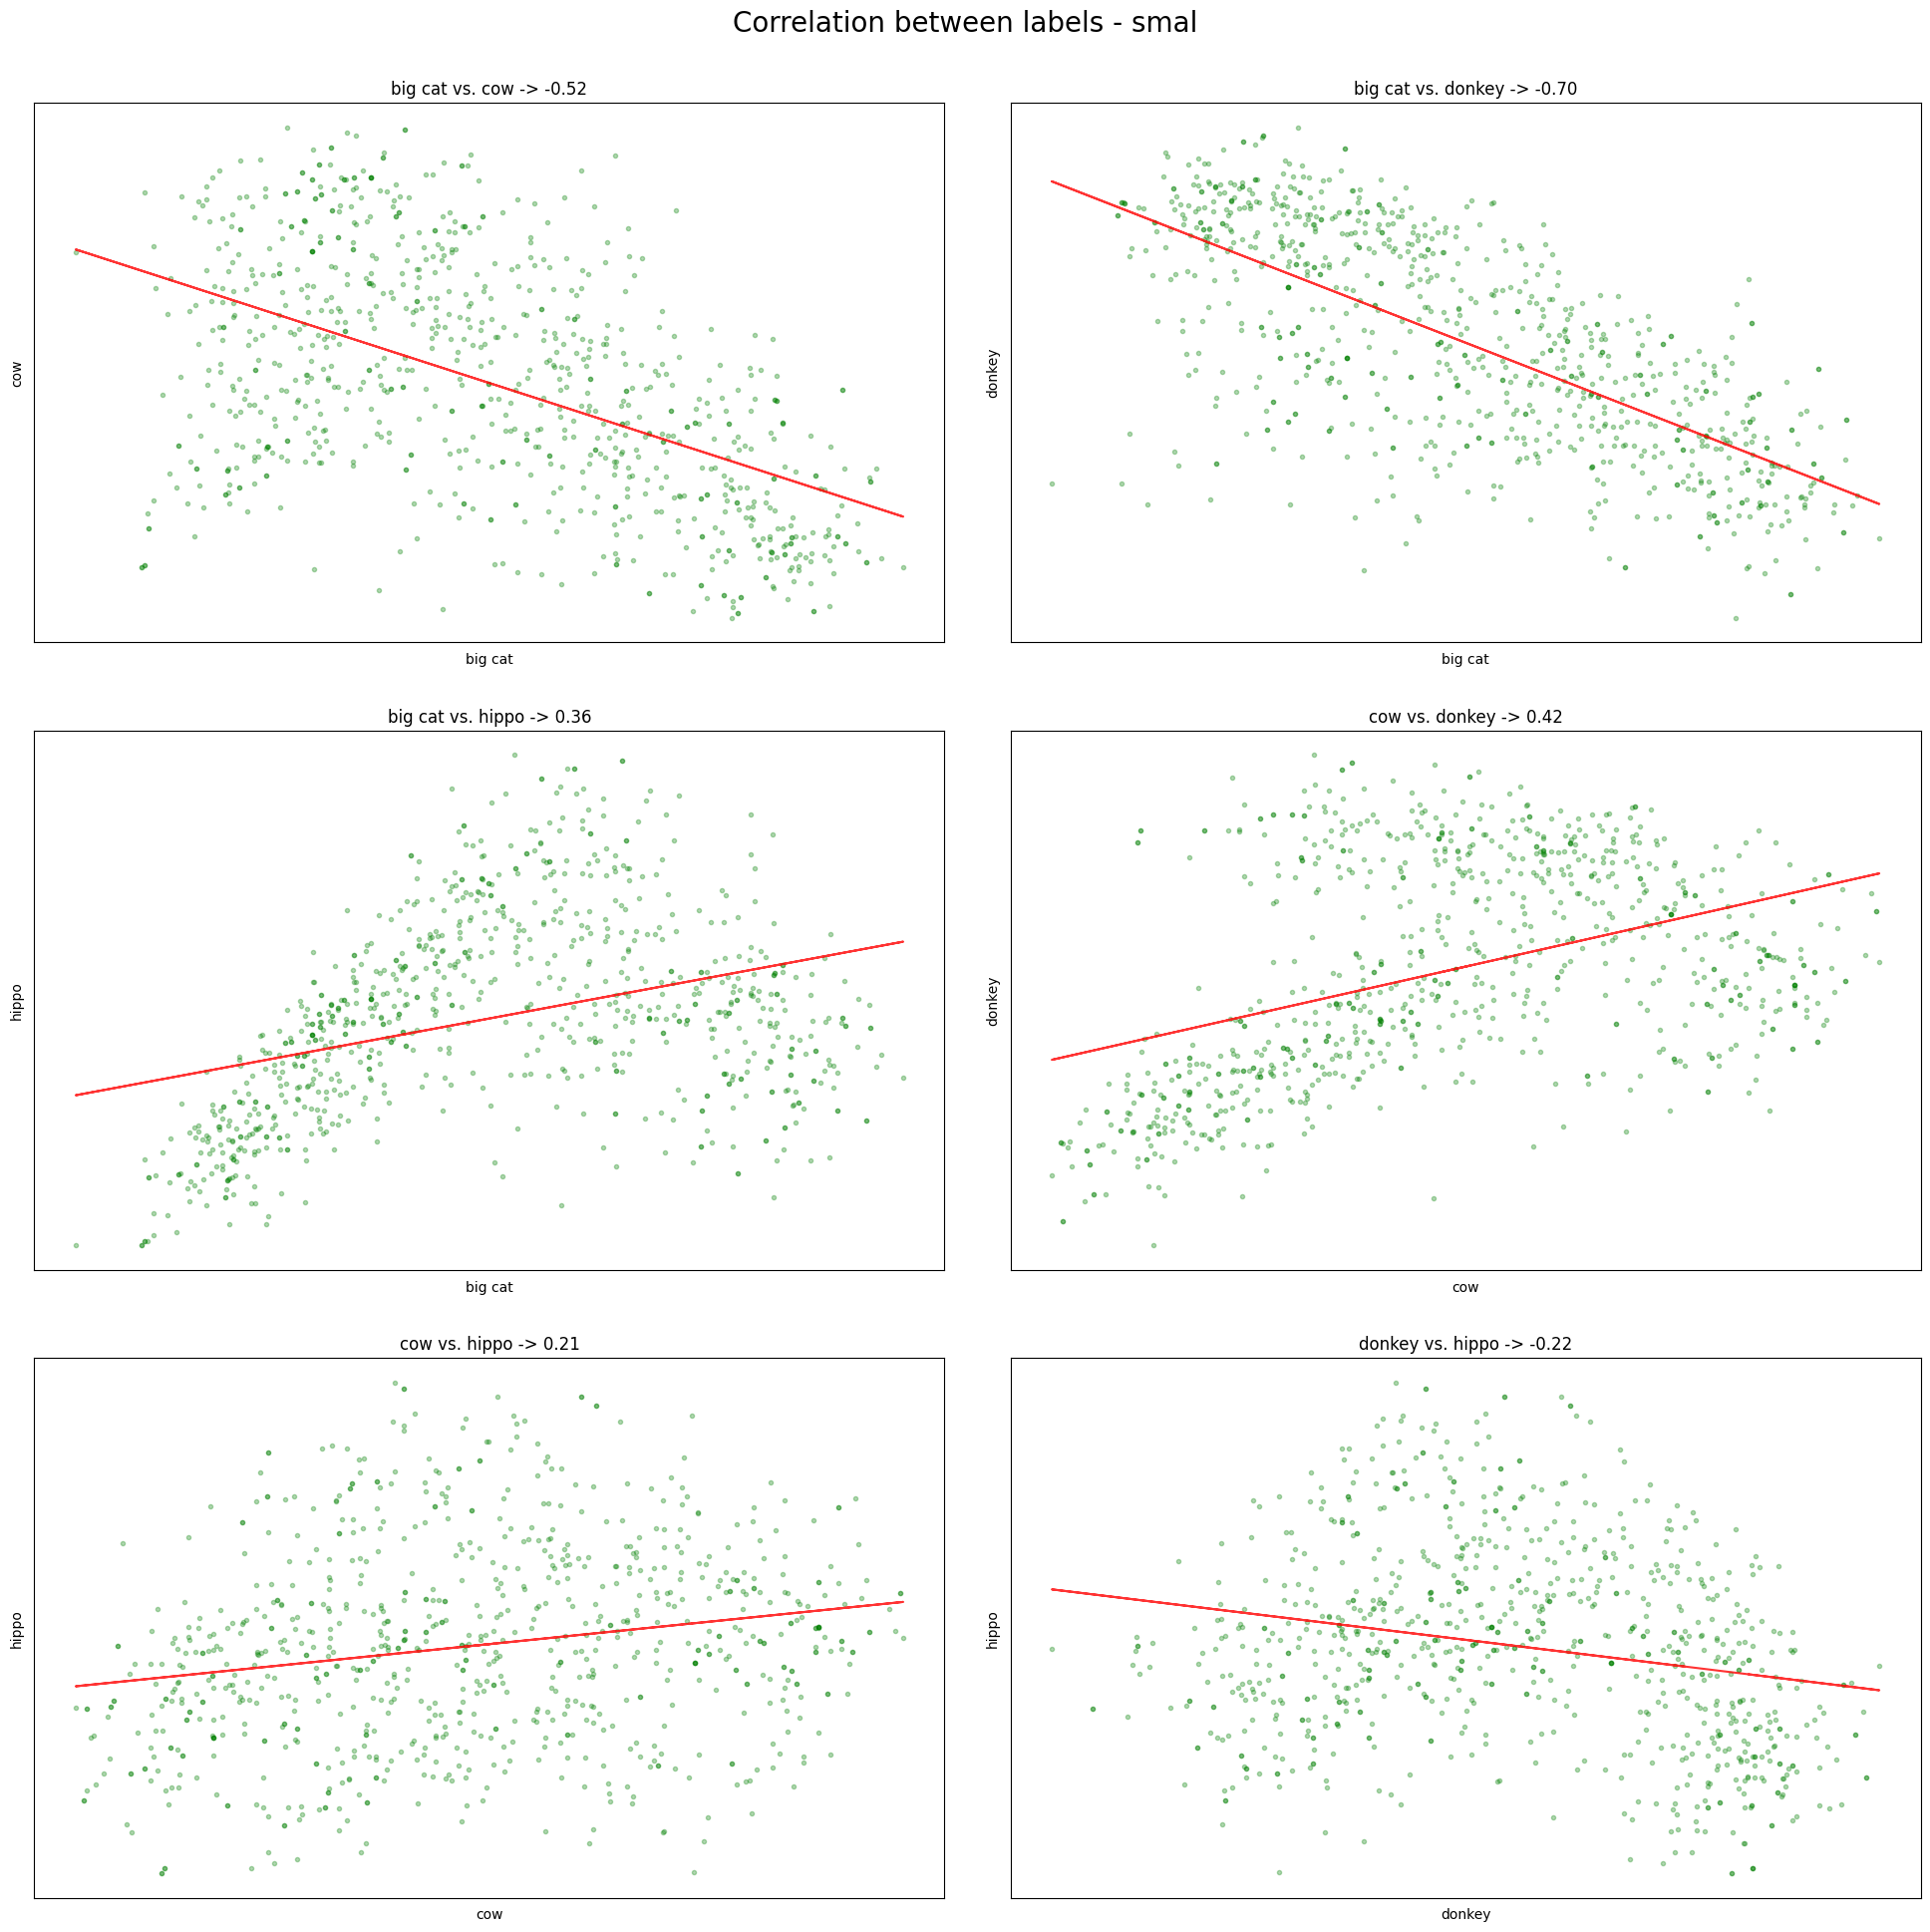

In [72]:
plot_correlations("/home/nadav2/dev/data/CLIP2Shape/images/smal_all_data", three_dmm="smal")